<a href="https://colab.research.google.com/github/nicolasyannick/wine-quality-ANN/blob/main/Wine_Quality_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split



# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# **The Dataset**

In [2]:
url = "https://drive.google.com/uc?id=1zpfCU58He0VHAmVItk2p9KBlJTZdRm1v"

df = pd.read_csv(url)
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Transforming the Dataset for binary classification

In [3]:
# converting the 'Quality' column into binary class for the purpose of this assignment
df['quality'] = df['quality'].apply(lambda x: 0 if x < 6 else 1)


# Drop the 'Id' column
df.drop('Id', axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Dataset Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


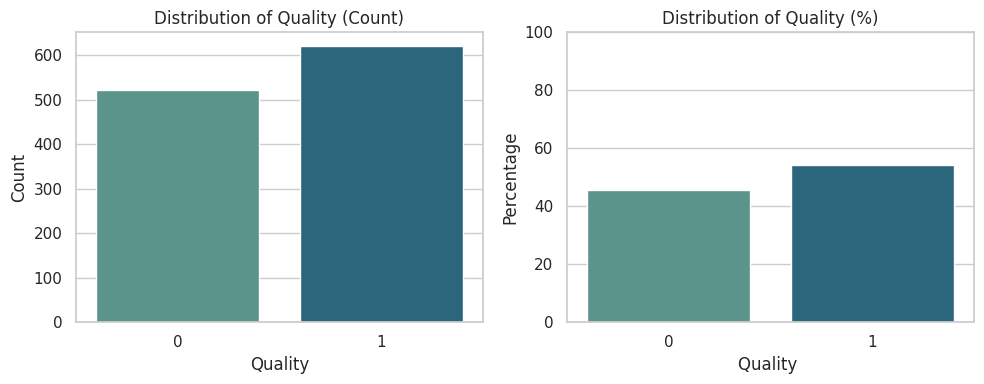

In [5]:
sns.set(style='whitegrid')

quality_class_count = df['quality'].value_counts()
quality_class_percentage = df['quality'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.countplot(data=df, x='quality', palette='crest', ax=axes[0])
axes[0].set_title('Distribution of Quality (Count)')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Count')

sns.barplot(x=quality_class_percentage.index, y=quality_class_percentage.values, palette='crest', ax=axes[1])
axes[1].set_title('Distribution of Quality (%)')
axes[1].set_xlabel('Quality ')
axes[1].set_ylabel('Percentage')
axes[1].set_ylim(0, 100)

# Adjust layout to prevent overlapping of titles
plt.tight_layout()

# Show the plots
plt.show()

## Outliers

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df < lower_bound) | (df > upper_bound))
print("Outliers for each column")
print(outliers.sum())

Outliers for each column
fixed acidity            44
volatile acidity         14
citric acid               1
residual sugar          110
chlorides                77
free sulfur dioxide      18
total sulfur dioxide     40
density                  36
pH                       20
sulphates                43
alcohol                  12
quality                   0
dtype: int64


In [7]:
# Calculate the boolean mask for rows without any outliers
rows_without_outliers = ~outliers.any(axis=1)

# Filter the DataFrame using the mask
df_without_outliers = df[rows_without_outliers]

In [8]:
df_without_outliers.shape

(848, 12)

## Independent Variables and Target Variable

In [9]:
x = df_without_outliers.iloc[:,:11]
y = df_without_outliers.iloc[:,-1:]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



## Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

# Transforming the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train = X_train.T
y_train = y_train.values.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.values.reshape(1, y_test.shape[0])


# **Implementation of ANN from scratch**

## Structure of the ANN

In [13]:
def define_structure(X, Y):
  input_layer = X.shape[0] # size of input layer
  hidden_layer = 4 #hidden layer of size 4 (4 neurons)
  output_layer = Y.shape[0] # size of output layer
  return (input_layer, hidden_layer, output_layer)
(input_layer, hidden_layer, output_layer) = define_structure(X_train, y_train)
print("The size of the input layer is: = " + str(input_layer))
print("The size of the hidden layer is: = " + str(hidden_layer))
print("The size of the output layer is: = " + str(output_layer))


The size of the input layer is: = 11
The size of the hidden layer is: = 4
The size of the output layer is: = 1


## Parameter Initialization

In [14]:
def initialize_parameters(input_layer, hidden_layer, output_layer):
  # initialize 1st layer output and input with random values
  W1 = np.random.randn(hidden_layer, input_layer) * 0.01 #Multiplying the random matrix by 0.01 is a common practice to scale down the initial weights.

  # initialize 1st layer output bias
  b1 = np.zeros((hidden_layer, 1))

  # initialize 2nd layer output and input with random values
  W2 = np.random.randn(output_layer, hidden_layer) * 0.01

  # initialize 2nd layer output bias
  b2 = np.zeros((output_layer,1))


  parameters = {"W1": W1,
  "b1": b1,
  "W2": W2,
  "b2": b2}
  return parameters


## Defining the Activation Functions

In [15]:
def sigmoid(z):
  s = 1/(1+np.exp(-z))
  return s


def relu(Z):
  A = np.maximum(0,Z)
  return A


def relu_derivative(z):
  z[z<=0] = 0
  z[z>0] = 1
  return z




## Define Forward Propagation

In [16]:
def forward_propagation(X, parameters):

  # Retrieve each parameter from the dictionary "parameters"
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  # Implementing Forward Propagation to calculate A2 probabilities
  Z1 = np.dot(W1, X) + b1
  A1 = relu(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)

  # Values needed in the backpropagation are stored in "cache"
  cache = {"Z1": Z1,
  "A1": A1,
  "Z2": Z2,
  "A2": A2}

  return A2, cache



## Cost Computation

In [17]:
def compute_cost(A2, Y, parameters):

  # number of example
  m = Y.shape[1] #calculates the number of columns in the Y array.

  # Compute the cross-entropy cost
  logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2), (1-Y))
  cost = -1/m*np.sum(logprobs)

  # makes sure cost is in dimension we expect, E.g., turns [[51]] into 51
  cost = np.squeeze(cost)

  return cost



## Backward Propagation

In [18]:
def backward_propagation(parameters, cache, X, Y):
  #number of training example
  m = X.shape[1]

  W1 = parameters['W1']
  W2 = parameters['W2']
  A1 = cache['A1']
  A2 = cache['A2']

  dZ2 = A2-Y
  dW2 = (1/m) * np.dot(dZ2, A1.T)
  db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.multiply(np.dot(W2.T,dZ2),(relu_derivative(A1)))
  dW1 = (1/m) * np.dot(dZ1, X.T)
  db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)

  grads = {"dW1": dW1,
  "db1": db1,
  "dW2": dW2,
  "db2": db2}

  return grads



## Update Parameters

In [19]:
def update_parameters(parameters, grads, learning_rate = 0.01):

  # Retrieve each parameter from "parameters" dictionary
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  b1 = parameters["b1"]
  b2 = parameters["b2"]

  # Retrieve each gradient from the "grads" dictionary
  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  # Update rule for each parameter
  W1 = W1 - dW1 * learning_rate
  b1 = b1 - db1 * learning_rate
  W2 = W2 - dW2 * learning_rate
  b2 = b2 - db2 * learning_rate

  parameters = {"W1": W1,
  "b1": b1,
  "W2": W2,
  "b2": b2}

  return parameters



In [20]:
def predict(parameters, X):
  # Computes probabilities using forward propagation
  Y_prediction = np.zeros((1, X.shape[1]))
  A2, cache = forward_propagation(X, parameters)

  for i in range(A2.shape[1]):
    # Convert probabilities A[0,i] to actual predictions p[0,i]
    if A2[0,i] > 0.5:
      Y_prediction[[0],[i]] = 1
    else:
     Y_prediction[[0],[i]] = 0

  return Y_prediction

## Defining the Neural Network Model

In [21]:
def nn_model(X_train, Y_train, X_test, Y_test, n_h, num_iterations = 1000, learning_rate = 0.001, print_cost=False):
  n_x = X_train.shape[0]
  n_y = Y_train.shape[0]

  # Initialize parameters with nputs: "n_x, n_h, n_y"
  parameters = initialize_parameters(n_x, n_h, n_y)

  # Retrieve W1, b1, W2, b2
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  b1 = parameters["b1"]
  b2 = parameters["b2"]
  costs = []

  for i in range(0, num_iterations):
    # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
    A2, cache = forward_propagation(X_train, parameters)

    # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
    cost = compute_cost(A2, Y_train, parameters)

    # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
    grads = backward_propagation(parameters, cache, X_train, Y_train)

    # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
    parameters = update_parameters(parameters, grads, learning_rate)

    # Print the cost every 200 iterations
    if print_cost and i % 200 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))

    # Record the cost
    if i % 100 == 0:
      costs.append(cost)

  # Predict test/train set examples
  Y_prediction_test = predict(parameters,X_test)
  Y_prediction_train = predict(parameters,X_train)

  # Print train/test Errors
  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

  parameters.update({"costs": costs, "n_h": n_h})
  return parameters


In [22]:
parameters = nn_model(X_train, y_train, X_test, y_test, n_h = 4, num_iterations = 10000, learning_rate = 0.1, print_cost=True)


Cost after iteration 0: 0.693111
Cost after iteration 200: 0.581485
Cost after iteration 400: 0.508398
Cost after iteration 600: 0.502595
Cost after iteration 800: 0.499623
Cost after iteration 1000: 0.496909
Cost after iteration 1200: 0.495583
Cost after iteration 1400: 0.492470
Cost after iteration 1600: 0.490736
Cost after iteration 1800: 0.488564
Cost after iteration 2000: 0.486544
Cost after iteration 2200: 0.484299
Cost after iteration 2400: 0.479501
Cost after iteration 2600: 0.473564
Cost after iteration 2800: 0.468995
Cost after iteration 3000: 0.464725
Cost after iteration 3200: 0.461369
Cost after iteration 3400: 0.458629
Cost after iteration 3600: 0.456554
Cost after iteration 3800: 0.455044
Cost after iteration 4000: 0.453820
Cost after iteration 4200: 0.452466
Cost after iteration 4400: 0.451692
Cost after iteration 4600: 0.450761
Cost after iteration 4800: 0.448211
Cost after iteration 5000: 0.447160
Cost after iteration 5200: 0.445979
Cost after iteration 5400: 0.444638

# Hyperparameter Tuning

## Learning rate = 0.001 ; 1000 Iterations ; various number of neurons

hidden layer is:  2
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------
hidden layer is:  3
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------
hidden layer is:  4
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------
hidden layer is:  5
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------
hidden layer is:  10
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------
hidden layer is:  15
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------


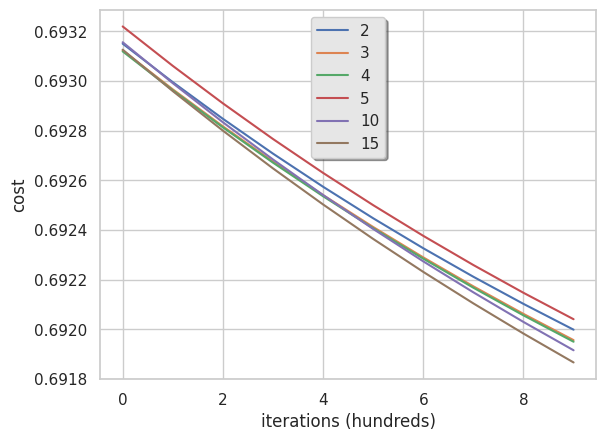

In [23]:
hidden_layer = [2,3,4,5,10,15]
models = {}

for i in hidden_layer:
  print ("hidden layer is: ",i)
  models[i] = nn_model(X_train, y_train, X_test, y_test, n_h = i, num_iterations = 1000, learning_rate = 0.001, print_cost = False)
  print ("-------------------------------------------------------")


for i in hidden_layer:
  plt.plot(np.squeeze(models[i]["costs"]), label= str(models[i]["n_h"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()





## Learning rate = 0.01 ; 1000 Iterations ; Various number of neurons

hidden layer is:  2
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------
hidden layer is:  3
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------
hidden layer is:  4
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------
hidden layer is:  5
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------
hidden layer is:  10
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------
hidden layer is:  15
train accuracy: 53.982300884955755 %
test accuracy: 57.64705882352941 %
-------------------------------------------------------


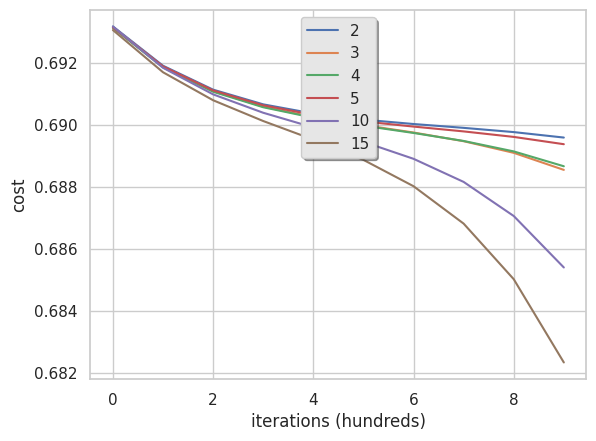

In [24]:
hidden_layer = [2,3,4,5,10,15]
models = {}

for i in hidden_layer:
  print ("hidden layer is: ",i)
  models[i] = nn_model(X_train, y_train, X_test, y_test, n_h = i, num_iterations = 1000, learning_rate = 0.01, print_cost = False)
  print ("-------------------------------------------------------")

for i in hidden_layer:
  plt.plot(np.squeeze(models[i]["costs"]), label= str(models[i]["n_h"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()


## Learning rate = 0.1 ; 1000 Iterations ; Various number of neurons

hidden layer is:  2
train accuracy: 75.22123893805309 %
test accuracy: 77.6470588235294 %
-------------------------------------------------------
hidden layer is:  3
train accuracy: 74.48377581120944 %
test accuracy: 77.05882352941177 %
-------------------------------------------------------
hidden layer is:  4
train accuracy: 75.22123893805309 %
test accuracy: 75.88235294117646 %
-------------------------------------------------------
hidden layer is:  5
train accuracy: 75.81120943952803 %
test accuracy: 78.23529411764706 %
-------------------------------------------------------
hidden layer is:  10
train accuracy: 75.51622418879056 %
test accuracy: 78.23529411764706 %
-------------------------------------------------------
hidden layer is:  15
train accuracy: 75.6637168141593 %
test accuracy: 77.05882352941177 %
-------------------------------------------------------


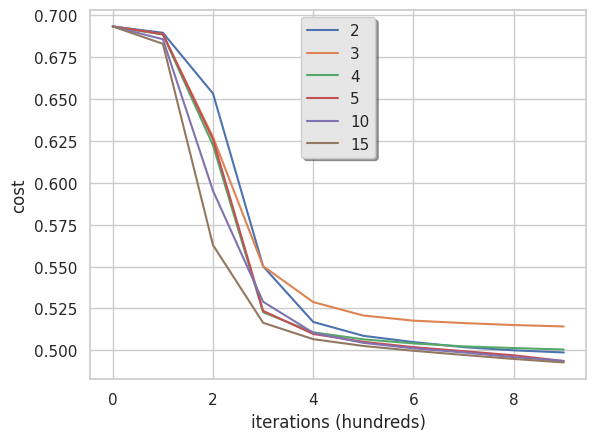

In [25]:
hidden_layer = [2,3,4,5,10,15]
models = {}

for i in hidden_layer:
  print ("hidden layer is: ",i)
  models[i] = nn_model(X_train, y_train, X_test, y_test, n_h = i, num_iterations = 1000, learning_rate = 0.1, print_cost = False)
  print ("-------------------------------------------------------")

for i in hidden_layer:
  plt.plot(np.squeeze(models[i]["costs"]), label= str(models[i]["n_h"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

## Learning rate = 0.25 ; 1000 Iterations ; Various number of neurons

hidden layer is:  2
train accuracy: 75.51622418879056 %
test accuracy: 77.6470588235294 %
-------------------------------------------------------
hidden layer is:  3
train accuracy: 75.51622418879056 %
test accuracy: 76.47058823529412 %
-------------------------------------------------------
hidden layer is:  4
train accuracy: 76.40117994100295 %
test accuracy: 78.23529411764706 %
-------------------------------------------------------
hidden layer is:  5
train accuracy: 79.20353982300885 %
test accuracy: 77.05882352941177 %
-------------------------------------------------------
hidden layer is:  10
train accuracy: 79.05604719764011 %
test accuracy: 73.52941176470588 %
-------------------------------------------------------
hidden layer is:  15
train accuracy: 79.20353982300885 %
test accuracy: 74.11764705882352 %
-------------------------------------------------------


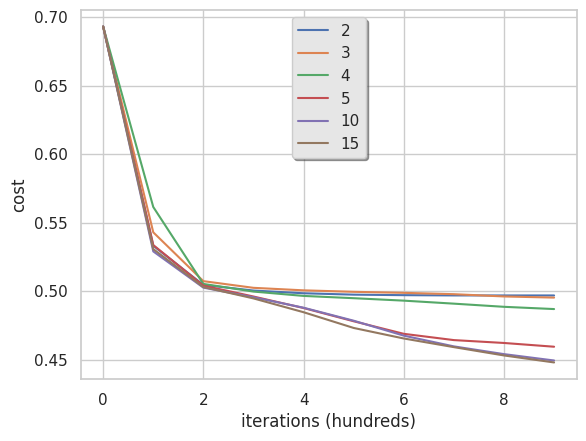

In [26]:
hidden_layer = [2,3,4,5,10,15]
models = {}

for i in hidden_layer:
  print ("hidden layer is: ",i)
  models[i] = nn_model(X_train, y_train, X_test, y_test, n_h = i, num_iterations = 1000, learning_rate = 0.25, print_cost = False)
  print ("-------------------------------------------------------")

for i in hidden_layer:
  plt.plot(np.squeeze(models[i]["costs"]), label= str(models[i]["n_h"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

## Learning rate = 0.01 ; 5000 Iterations ; Various number of neurons

hidden layer is:  2
train accuracy: 73.45132743362831 %
test accuracy: 75.29411764705883 %
-------------------------------------------------------
hidden layer is:  3
train accuracy: 73.30383480825958 %
test accuracy: 75.88235294117646 %
-------------------------------------------------------
hidden layer is:  4
train accuracy: 73.45132743362831 %
test accuracy: 76.47058823529412 %
-------------------------------------------------------
hidden layer is:  5
train accuracy: 75.07374631268436 %
test accuracy: 77.6470588235294 %
-------------------------------------------------------
hidden layer is:  10
train accuracy: 74.77876106194691 %
test accuracy: 77.6470588235294 %
-------------------------------------------------------
hidden layer is:  15
train accuracy: 75.07374631268436 %
test accuracy: 76.47058823529412 %
-------------------------------------------------------


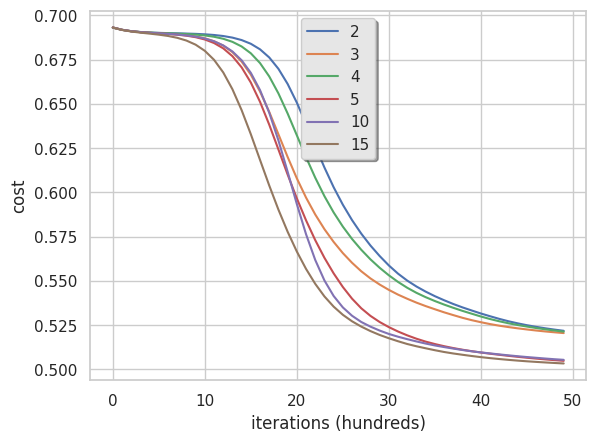

In [27]:
hidden_layer = [2,3,4,5,10,15]
models = {}

for i in hidden_layer:
  print ("hidden layer is: ",i)
  models[i] = nn_model(X_train, y_train, X_test, y_test, n_h = i, num_iterations = 5000, learning_rate = 0.01, print_cost = False)
  print ("-------------------------------------------------------")

for i in hidden_layer:
  plt.plot(np.squeeze(models[i]["costs"]), label= str(models[i]["n_h"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

## Learning rate = 0.01 ; 5000 Iterations ; Various number of neurons

hidden layer is:  2
train accuracy: 75.6637168141593 %
test accuracy: 77.6470588235294 %
-------------------------------------------------------
hidden layer is:  3
train accuracy: 75.6637168141593 %
test accuracy: 76.47058823529412 %
-------------------------------------------------------
hidden layer is:  4
train accuracy: 76.84365781710915 %
test accuracy: 75.88235294117646 %
-------------------------------------------------------
hidden layer is:  5
train accuracy: 79.49852507374631 %
test accuracy: 76.47058823529412 %
-------------------------------------------------------
hidden layer is:  10
train accuracy: 80.3834808259587 %
test accuracy: 75.29411764705883 %
-------------------------------------------------------
hidden layer is:  15
train accuracy: 84.070796460177 %
test accuracy: 72.94117647058823 %
-------------------------------------------------------


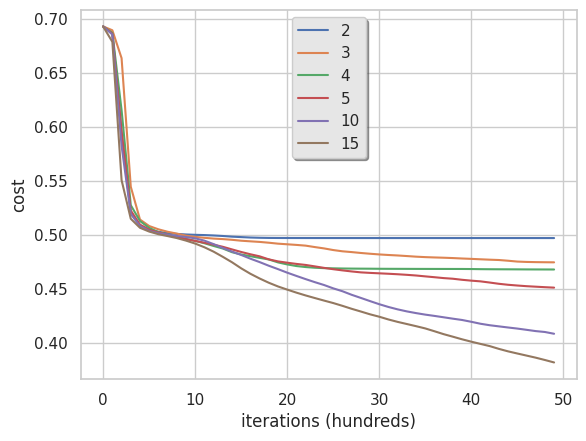

In [28]:
hidden_layer = [2,3,4,5,10,15]
models = {}

for i in hidden_layer:
  print ("hidden layer is: ",i)
  models[i] = nn_model(X_train, y_train, X_test, y_test, n_h = i, num_iterations = 5000, learning_rate = 0.1, print_cost = False)
  print ("-------------------------------------------------------")

for i in hidden_layer:
  plt.plot(np.squeeze(models[i]["costs"]), label= str(models[i]["n_h"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

## Learning rate = 0.1 ; 5000 Iterations ; Number of neurons = 10

In [29]:
parameters = nn_model(X_train, y_train, X_test, y_test, n_h = 10, num_iterations = 5000, learning_rate = 0.1, print_cost=False)


train accuracy: 79.79351032448378 %
test accuracy: 78.82352941176471 %


In [30]:
y_pred = predict(parameters,X_test)

# Convert one-hot encoded labels to binary
y_test_binary = np.squeeze(np.array(y_test), axis=0)
y_pred_binary = np.squeeze(np.array(y_pred), axis=0)


## Evaluation Metrics

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

accuracy = accuracy_score(y_test_binary,y_pred_binary)

cm = confusion_matrix(y_test_binary,y_pred_binary)

tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)

f1_score = 2* tp / (2 * tp + fp + fn )

auc = roc_auc_score(y_test_binary,y_pred_binary)


print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("F1 Score:", f1_score)
print("AUC:", auc)

Accuracy: 0.788235294117647
Sensitivity: 0.7755102040816326
F1 Score: 0.8085106382978723
AUC: 0.7905328798185941


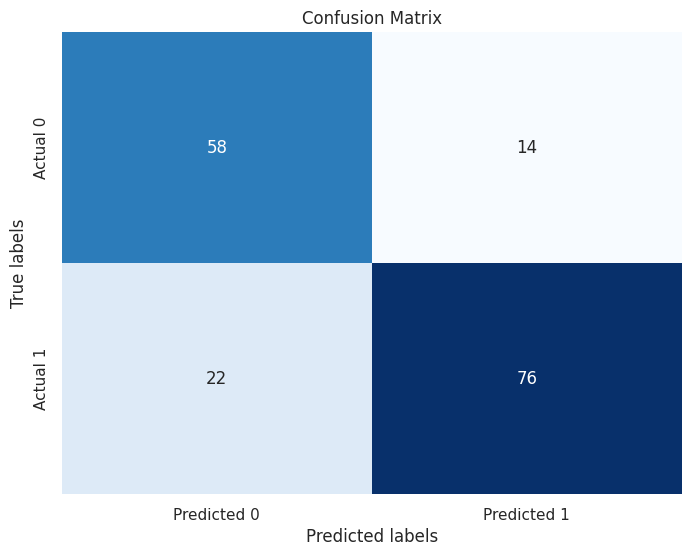

In [32]:
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# ANN using Sklearn MLP package

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

# Transforming the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10), alpha=0.1, max_iter=5000)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=10, max_iter=5000)

In [37]:
mlp.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 5000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [38]:
y_pred = mlp.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

c_report = classification_report(y_test, y_pred)
print('\n \n Classification report : \n',c_report)

Confusion matrix : 
 [[55 17]
 [28 70]]

 
 Classification report : 
               precision    recall  f1-score   support

           0       0.66      0.76      0.71        72
           1       0.80      0.71      0.76        98

    accuracy                           0.74       170
   macro avg       0.73      0.74      0.73       170
weighted avg       0.74      0.74      0.74       170

